# **Project for "Data Science & Machine Learning" discipline of student Taldybayev Batyrkhan from IT3-2203**
# **Unsupervised Learning**
---
## The dataset theme: Air Quality in India. Data are taken from stations.
## At first, analyzing the dataset and it's problems, graphs
##
## Importing libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_day = pd.read_csv("station_day.csv")

display(df_day.head())
display(df_day.info())
display(df_day.describe())

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


None

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


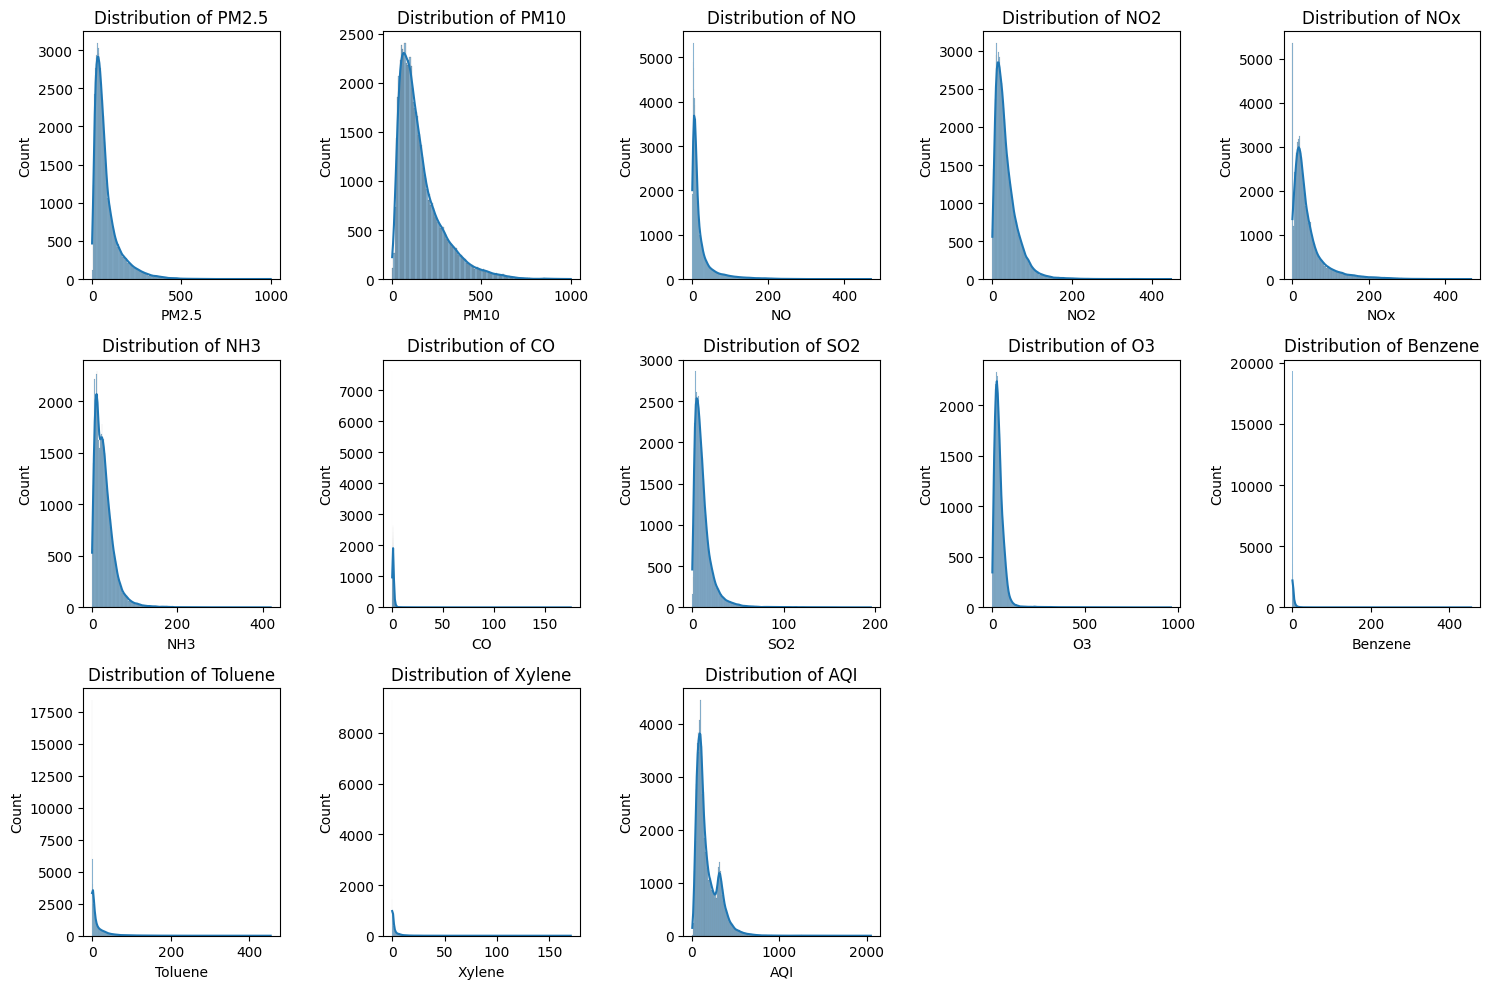

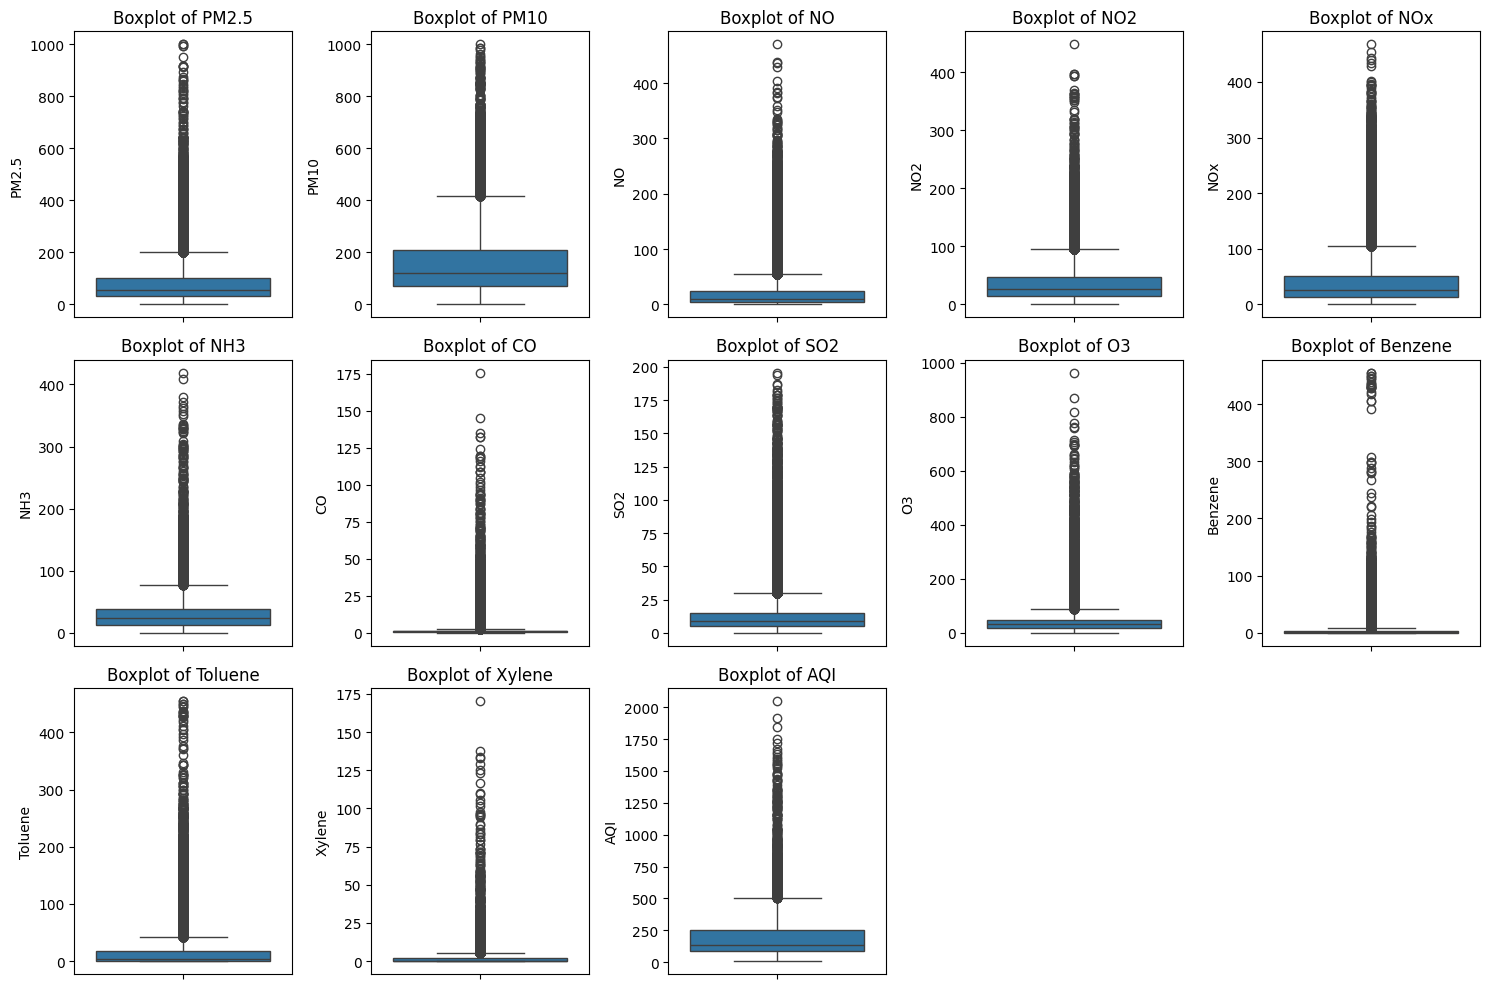

In [4]:
num_cols = df_day.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, (len(num_cols)+2)//3, i+1)
    sns.histplot(df_day[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, (len(num_cols)+2)//3, i+1)
    sns.boxplot(y=df_day[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Distribution shows that there are many small values and few large values, all distributions are sharply skewed to the left and along the long tails, it is clear that there are outliers
## Boxplot also shows that the data is heavily noisy with outliers.

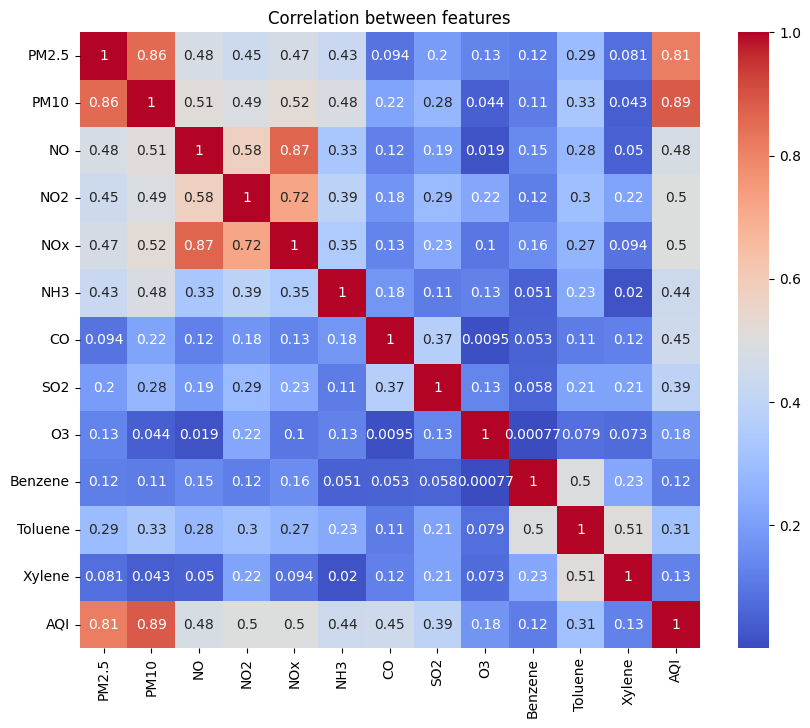

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_day[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between features")
plt.show()

## There is a high correlation between PM2.5 and PM10
## NOx, NO, NO2 are strongly correlated with each other

In [6]:
missing = df_day.isnull().mean().sort_values(ascending=False)
print("Percentage of skips by column:")
print(missing)

for col in num_cols:
    q1 = df_day[col].quantile(0.25)
    q3 = df_day[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df_day[col] < (q1 - 1.5 * iqr)) | (df_day[col] > (q3 + 1.5 * iqr))).sum()
    print(f"{col}: emissions {outliers} of {len(df_day)}")


Percentage of skips by column:
Xylene        0.788050
NH3           0.445272
PM10          0.395298
Toluene       0.358236
Benzene       0.291156
O3            0.236664
SO2           0.233295
PM2.5         0.200167
AQI_Bucket    0.194474
AQI           0.194474
NO            0.158338
NO2           0.153163
NOx           0.143472
CO            0.120313
Date          0.000000
StationId     0.000000
dtype: float64
PM2.5: emissions 6448 of 108035
PM10: emissions 3084 of 108035
NO: emissions 9869 of 108035
NO2: emissions 3786 of 108035
NOx: emissions 7604 of 108035
NH3: emissions 2241 of 108035
CO: emissions 6460 of 108035
SO2: emissions 5067 of 108035
O3: emissions 2985 of 108035
Benzene: emissions 5987 of 108035
Toluene: emissions 6619 of 108035
Xylene: emissions 2913 of 108035
AQI: emissions 1795 of 108035


## The signs of Xylene (79%), NH3 (44%), PM10 (39%), Toluene (35%), Benzene (29%) have a lot of missings
## Only CO, NO, NO2, NOx — relatively few missings (10-15%)
---
## It needs to be cleaned up the data from the passes. I will exclude columns where there are more than 70% missings, that is, Xylene, and fill in the remaining gaps with the median. Although this blurs the structure, it's still better than losing many columns due to dropping them.

In [7]:
missing = df_day.isnull().mean()
cols_to_keep = missing[missing < 0.7].index.tolist()
print('Columns left:', cols_to_keep)
df_clean = df_day[cols_to_keep].copy()

for col in df_clean.select_dtypes(include=['float', 'int']).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

Columns left: ['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket']


In [8]:
print(df_clean.isnull().sum())

StationId         0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
AQI               0
AQI_Bucket    21010
dtype: int64


### I can get rid of the AQI_Bucket, it doesn't play a role in this dataset for analysis.

In [9]:
df_clean.drop(columns=['AQI_Bucket'], inplace=True)
print(df_clean.columns)

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'AQI'],
      dtype='object')


---
## Preprocessing. I want to see all scalers and choose the best result, but actually for this dataset RobustScaler is the best option

In [10]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df_clean[features].copy()
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02
...,...,...,...,...,...,...,...,...,...,...,...
108030,8.65,16.46,10.29,27.21,26.66,23.59,0.69,4.36,30.59,1.32,7.26
108031,11.80,18.47,10.29,27.21,26.66,23.59,0.68,3.49,38.95,1.42,7.92
108032,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64
108033,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40


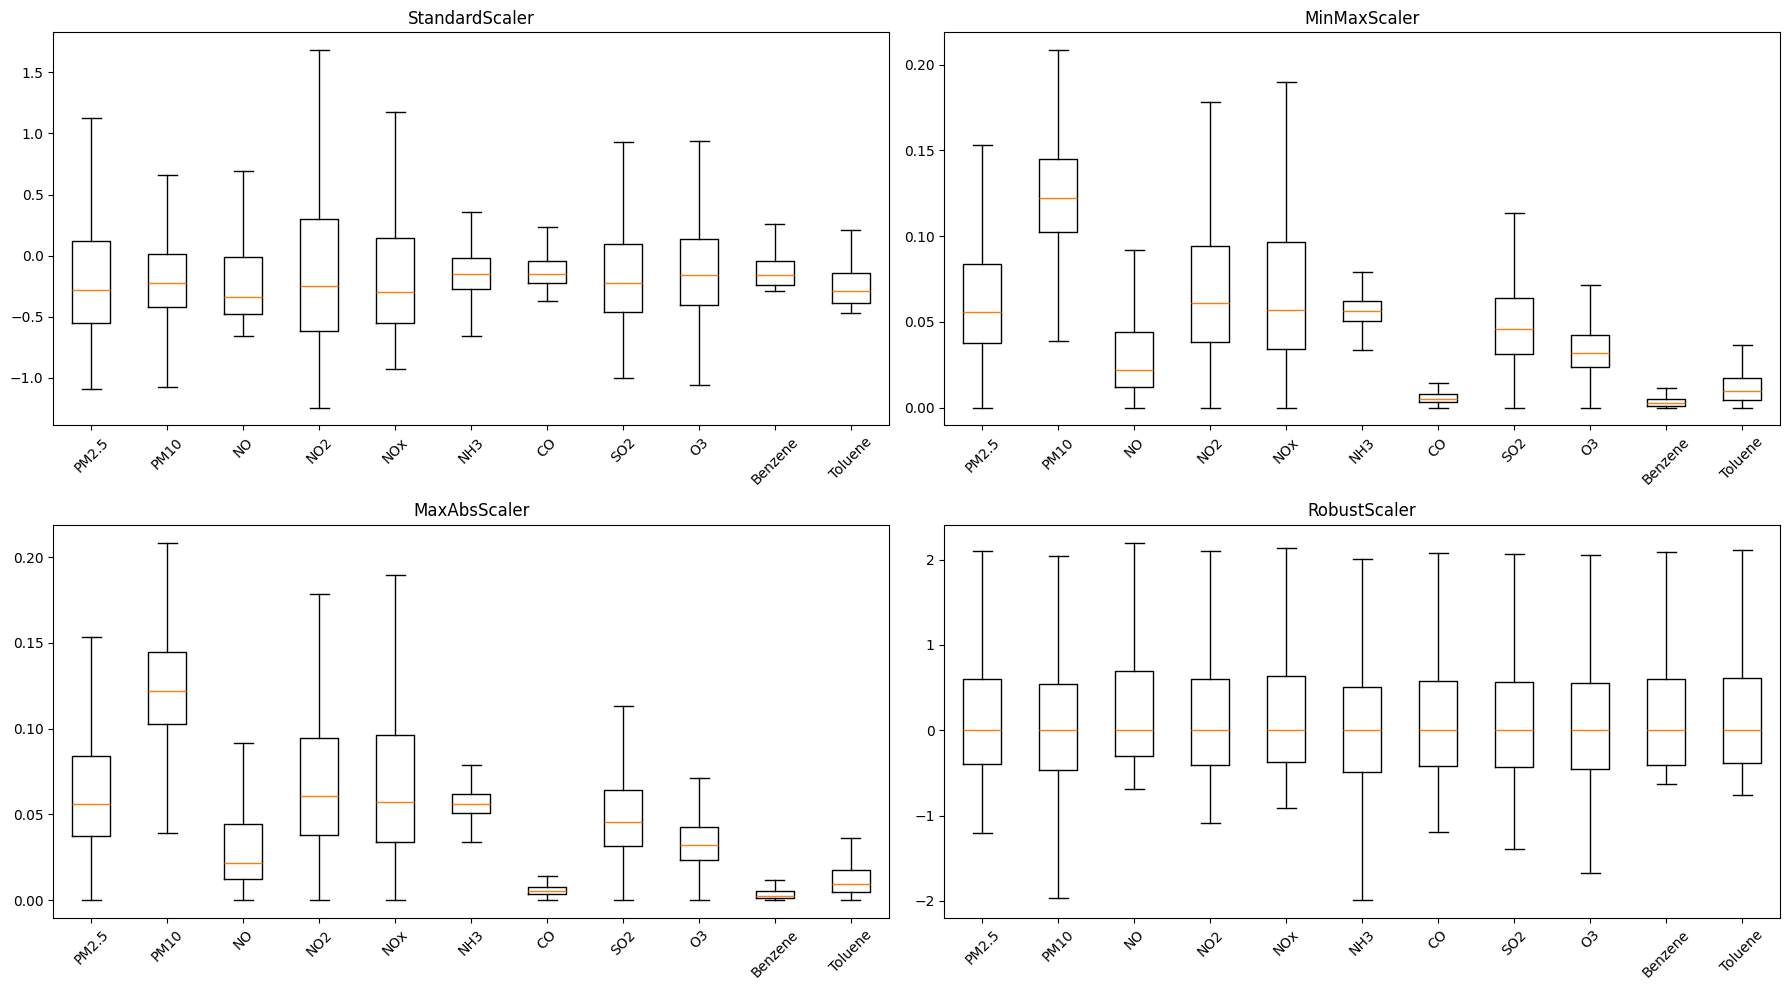

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler()
}

plt.figure(figsize=(18, 10))

for idx, (name, scaler) in enumerate(scalers.items()):
    X_scaled = scaler.fit_transform(X)
    plt.subplot(2, 2, idx+1)
    plt.boxplot(X_scaled, labels=X.columns, showfliers=False)
    plt.title(name)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## As I thought, RobustScaler is the most ideal option and it shows the best results among all scalers

In [12]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

---
## Dimensionality reduction
##
## PCA allows to “flatten” multidimensional data into 2-3 dimensions with minimal information loss
## This is useful for visualization, for clustering and to reduce noise
## To select the optimal number of components, i build a cumulative explained variation plot based on the results of PCA. This graph shows how many components are needed to cover 90% and 95% of the variance of the original data

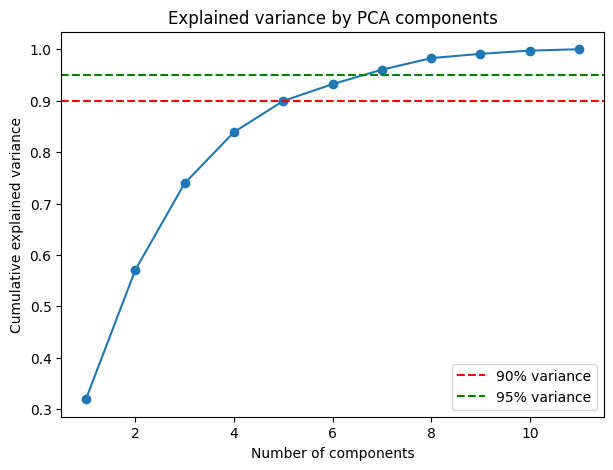

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.legend()
plt.show()

## Graph shows that 6-7 PCA components are the best for maximum information, so i use it for clustering, but also i make PCA with 2 components to see the graph. Just for visualisation

In [14]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_full = PCA(n_components=6)
X_pca_full = pca_full.fit_transform(X_scaled)

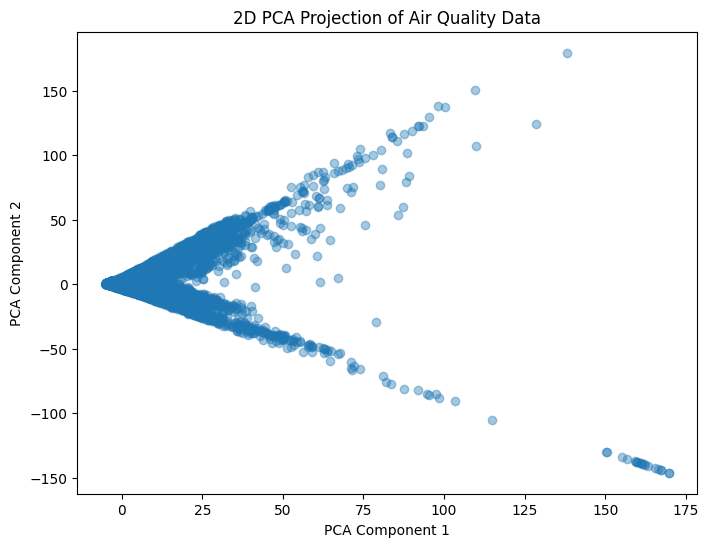

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.4)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of Air Quality Data')
plt.show()

---
## Clustering
## At first, I need to use Elbow method to find the best K and calculate what eps is the best for DBSCAN

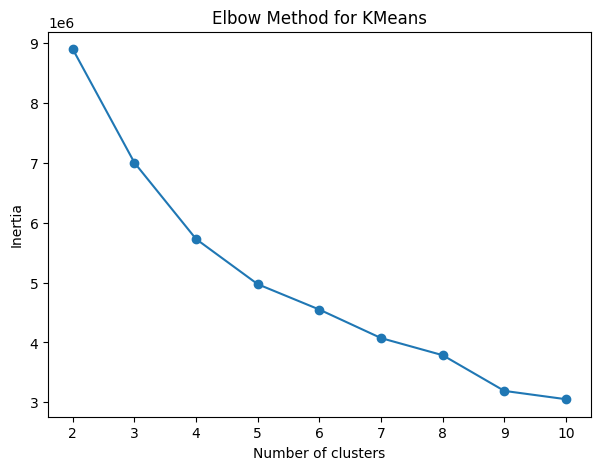

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_full)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

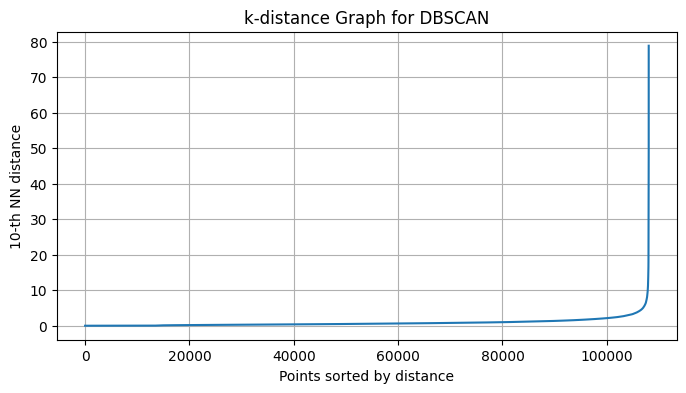

In [17]:
from sklearn.neighbors import NearestNeighbors

min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_pca_full)
distances, indices = neighbors_fit.kneighbors(X_pca_full)

k_distances = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.ylabel(f"{min_samples}-th NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance Graph for DBSCAN")
plt.grid(True)
plt.show()

In [18]:
N = 5000
idx = np.random.choice(X_pca_full.shape[0], N, replace=False)
X_sub = X_pca_full[idx]

In [19]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans_sub = kmeans.fit_predict(X_sub)

In [21]:
dbscan = DBSCAN(eps=1.2, min_samples=10)
labels_dbscan_sub = dbscan.fit_predict(X_sub)

In [22]:
agg = AgglomerativeClustering(n_clusters=5)
labels_agg_sub = agg.fit_predict(X_sub)

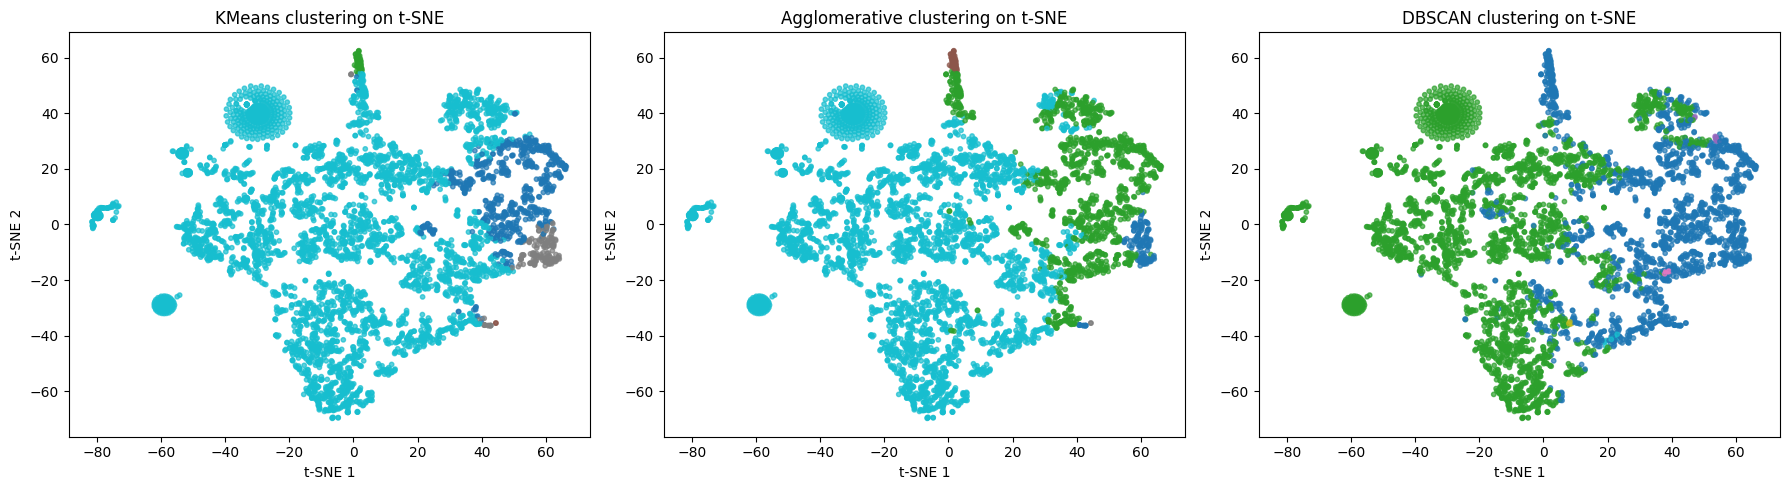

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=69, perplexity=40, n_iter=2000)
X_tsne = tsne.fit_transform(X_sub)

plt.figure(figsize=(18, 5))
algorithms = {
    'KMeans': labels_kmeans_sub,
    'Agglomerative': labels_agg_sub,
    'DBSCAN': labels_dbscan_sub
}
for i, (name, labels) in enumerate(algorithms.items()):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
    plt.title(f'{name} clustering on t-SNE')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

print("Comparing Silhouette Metrics:")
for name, labels in algorithms.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    score = silhouette_score(X_sub, labels)
    print(f"{name}: {score:.3f} ({n_clusters} clusters)")

Comparing Silhouette Metrics:
KMeans: 0.538 (5 clusters)
Agglomerative: 0.435 (5 clusters)
DBSCAN: -0.024 (5 clusters)


---

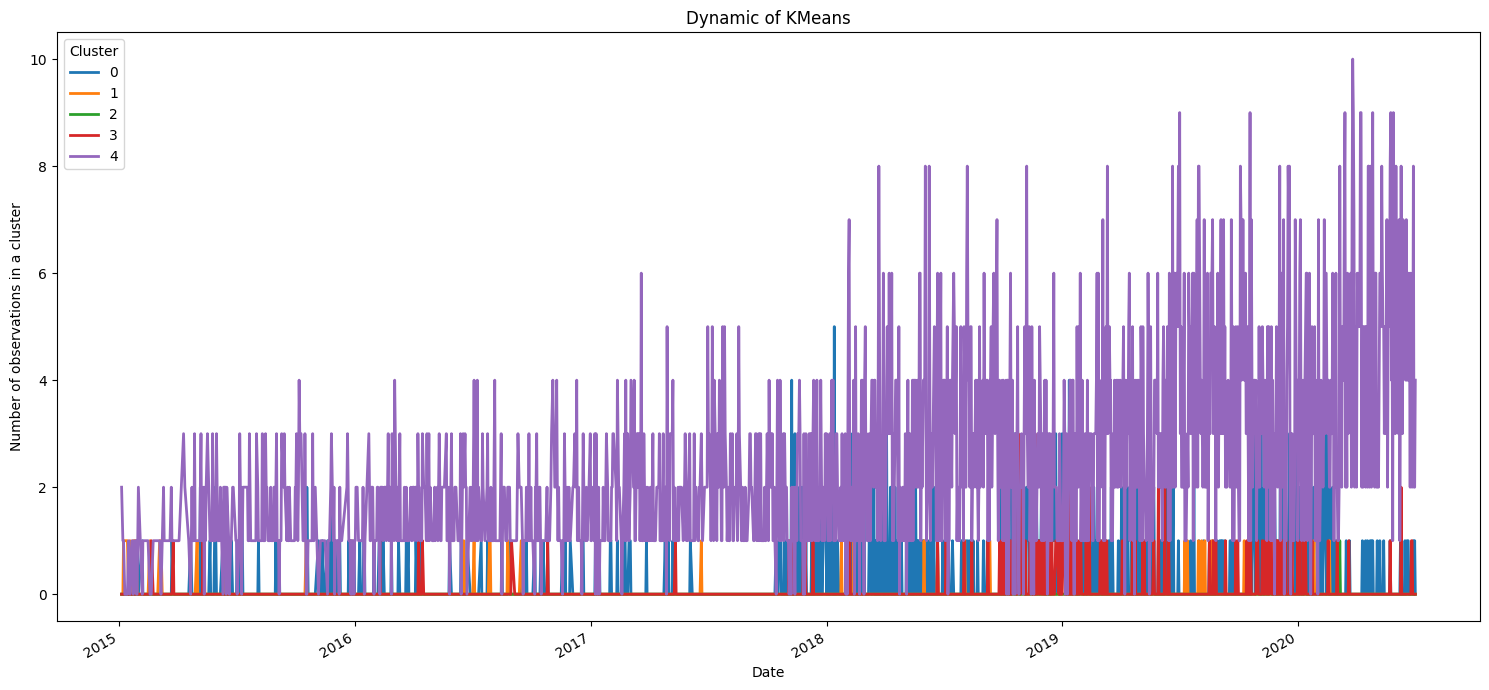

In [25]:
df_results = df_clean.iloc[idx].copy()
df_results['Cluster_KMeans'] = labels_kmeans_sub
df_results['Date'] = pd.to_datetime(df_results['Date'])

pivot = df_results.pivot_table(index='Date', columns='Cluster_KMeans', values='PM2.5', aggfunc='count')
pivot = pivot.fillna(0)

pivot.plot(figsize=(15,7), lw=2)
plt.title('Dynamic of KMeans')
plt.ylabel('Number of observations in a cluster')
plt.xlabel('Date')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

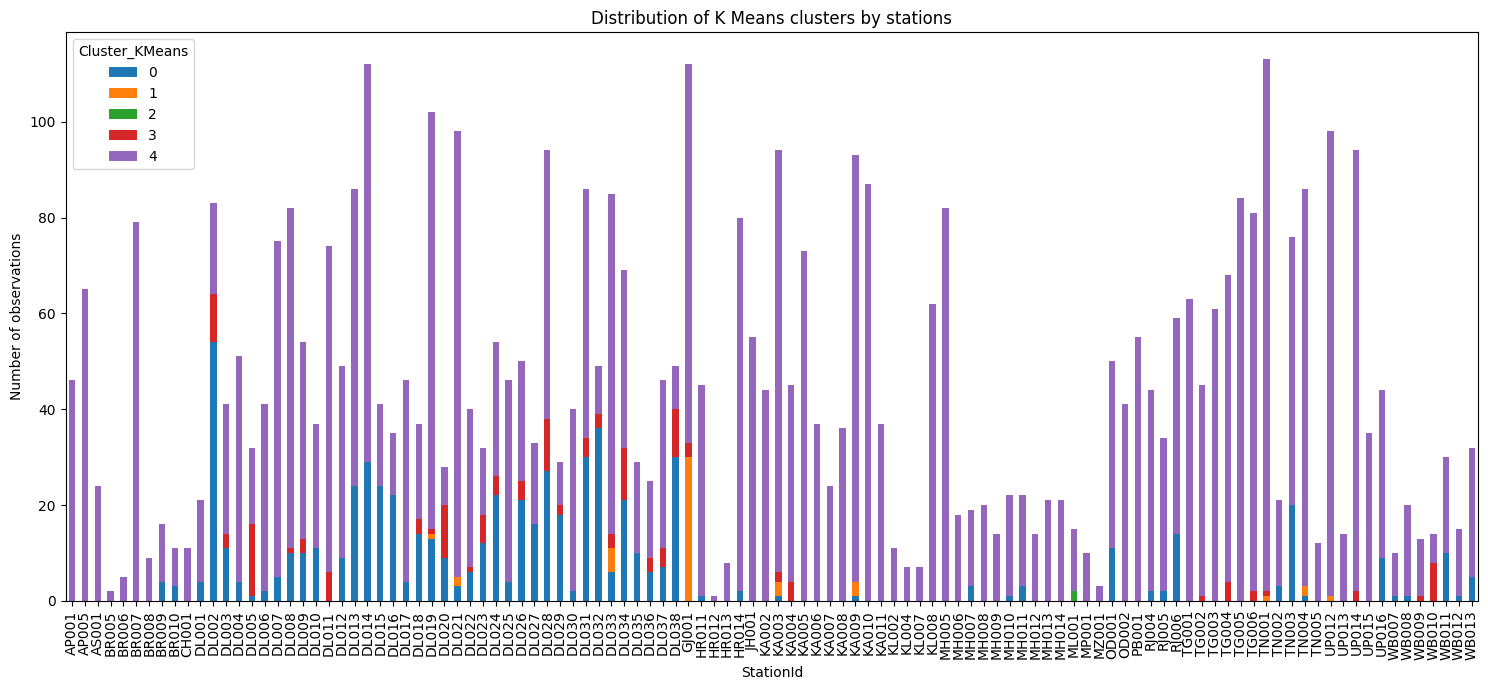

In [26]:
station_cluster_counts = df_results.groupby(['StationId', 'Cluster_KMeans']).size().unstack(fill_value=0)
station_cluster_counts.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Distribution of K Means clusters by stations')
plt.xlabel('StationId')
plt.ylabel('Number of observations')
plt.tight_layout()
plt.show()